In [4]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_excel("CreditcardBalance.xlsx")
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CURRENT EMPLOY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,APPROVED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,1,1,1,0,0,NaN,2,C,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,1,1,1,0,0,NaN,2,C,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,1,1,0,0,0,Security staff,2,C,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,Sales staff,1,0,0
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,Sales staff,1,C,1


# Determine the Characteristics of the Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24672 entries, 0 to 24671
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   24672 non-null  int64  
 1   CODE_GENDER          24672 non-null  object 
 2   FLAG_OWN_CAR         24672 non-null  object 
 3   FLAG_OWN_REALTY      24672 non-null  object 
 4   CNT_CHILDREN         24672 non-null  int64  
 5   AMT_INCOME_TOTAL     24672 non-null  float64
 6   NAME_INCOME_TYPE     24672 non-null  object 
 7   NAME_EDUCATION_TYPE  24672 non-null  object 
 8   NAME_FAMILY_STATUS   24672 non-null  object 
 9   NAME_HOUSING_TYPE    24672 non-null  object 
 10  AGE                  24672 non-null  float64
 11  CURRENT EMPLOY       24672 non-null  int64  
 12  FLAG_MOBIL           24672 non-null  int64  
 13  FLAG_WORK_PHONE      24672 non-null  int64  
 14  FLAG_PHONE           24672 non-null  int64  
 15  FLAG_EMAIL           24672 non-null 

# Identify the Missing Data in the Dataset

In [6]:
df.isnull().sum()

ID                        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
AGE                       0
CURRENT EMPLOY            0
FLAG_MOBIL                0
FLAG_WORK_PHONE           0
FLAG_PHONE                0
FLAG_EMAIL                0
OCCUPATION_TYPE        7629
CNT_FAM_MEMBERS           0
STATUS                    0
APPROVED                  0
dtype: int64

# Handling the Missing Data in the Dataset

In [7]:
# Remove the columns with excessive missing data 

df.drop(columns=["OCCUPATION_TYPE"], inplace = True)
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CURRENT EMPLOY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS,APPROVED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,1,1,1,0,0,2,C,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,1,1,1,0,0,2,C,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,1,1,0,0,0,2,C,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,1,0,0
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,1,C,1


# Creating Columns and Replacing Labels

In [8]:
df["ID"].replace([1, 2, 3], ["Number 1", "Number 2", "Number 3"], inplace = True)
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CURRENT EMPLOY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS,APPROVED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,1,1,1,0,0,2,C,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,1,1,1,0,0,2,C,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,1,1,0,0,0,2,C,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,1,0,0
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,1,1,0,1,1,1,C,1


# Determine Frequencies of Groups

In [9]:
df[['ID']].value_counts()

ID     
5008804    1
5100208    1
5100346    1
5100345    1
5100343    1
          ..
5053733    1
5053732    1
5053731    1
5053730    1
5150487    1
Length: 24672, dtype: int64

In [10]:
df[['CODE_GENDER']].value_counts()

CODE_GENDER
F              16377
M               8295
dtype: int64

In [11]:
df[["NAME_EDUCATION_TYPE"]].value_counts()

NAME_EDUCATION_TYPE          
Secondary / secondary special    16755
Higher education                  6634
Incomplete higher                  994
Lower secondary                    266
Academic degree                     23
dtype: int64

In [12]:
df[['AGE']].value_counts()

AGE      
42.517808    32
46.290411    29
37.775342    26
40.183562    26
42.945205    25
             ..
38.010959     1
54.276712     1
54.271233     1
38.071233     1
20.517808     1
Length: 6655, dtype: int64

In [13]:
df[['CURRENT EMPLOY']].value_counts()

CURRENT EMPLOY
1                 20491
0                  4181
dtype: int64

In [14]:
df[['APPROVED']].value_counts()

APPROVED
1           17461
0            7211
dtype: int64

In [15]:
df[['NAME_FAMILY_STATUS']].value_counts()

NAME_FAMILY_STATUS  
Married                 16915
Single / not married     3352
Civil marriage           1963
Separated                1432
Widow                    1010
dtype: int64

# Determine the Distribution of Numeric Data

In [16]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,CURRENT EMPLOY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,APPROVED
count,2.467200e+04,24672.000000,2.467200e+04,24672.000000,24672.000000,24672.0,24672.000000,24672.000000,24672.000000,24672.000000,24672.000000
mean,5.078863e+06,0.422584,1.870750e+05,43.897269,0.830537,1.0,0.227910,0.294423,0.091683,2.184257,0.707725
std,4.153533e+04,0.753254,1.020948e+05,11.456851,0.375168,0.0,0.419493,0.455792,0.288584,0.912098,0.454817
min,5.008804e+06,0.000000,2.700000e+04,20.517808,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045511e+06,0.000000,1.215000e+05,34.360959,1.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.069454e+06,0.000000,1.575000e+05,42.884932,1.000000,1.0,0.000000,0.000000,0.000000,2.000000,1.000000
75%,5.115437e+06,1.000000,2.250000e+05,53.295890,1.000000,1.0,0.000000,1.000000,0.000000,3.000000,1.000000
max,5.150487e+06,19.000000,1.575000e+06,68.909589,1.000000,1.0,1.000000,1.000000,1.000000,20.000000,1.000000


In [17]:
df.mode()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CURRENT EMPLOY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS,APPROVED
0,5008804,F,N,Y,0.0,135000.0,Working,Secondary / secondary special,Married,House / apartment,42.517808,1.0,1.0,0.0,0.0,0.0,2.0,C,1.0
1,5008805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5008806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5008808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5008810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24667,5150481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24668,5150483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24669,5150484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24670,5150485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Relationships between Variables

In [18]:
pd.crosstab(df["NAME_INCOME_TYPE"], df["APPROVED"], margins = True)

# NAME_INCOME_TYPE
## how many approved the card about the income type?   
## which has the least? 

APPROVED,0,1,All
NAME_INCOME_TYPE,,,
Commercial associate,1713,4136,5849
Pensioner,1218,2932,4150
State servant,576,1377,1953
Student,2,7,9
Working,3702,9009,12711
All,7211,17461,24672


In [19]:
pd.crosstab(df["NAME_FAMILY_STATUS"], df["APPROVED"], margins = True)

# NAME_FAMILY_STATUS
## how many approved the card about the FAMILY STATUS type?   
## which has the least? 


APPROVED,0,1,All
NAME_FAMILY_STATUS,,,
Civil marriage,554,1409,1963
Married,4868,12047,16915
Separated,410,1022,1432
Single / not married,1066,2286,3352
Widow,313,697,1010
All,7211,17461,24672


In [20]:
pd.crosstab(df["AGE"], df["APPROVED"], margins = True)

## AGE
## how many approved the card about the age type?   
## which has the least? 

APPROVED,0,1,All
AGE,,,
20.517808219178082,0,1,1
21.10958904109589,1,0,1
21.15890410958904,2,0,2
21.252054794520546,0,4,4
21.805479452054794,1,0,1
...,...,...,...
68.73424657534247,0,1,1
68.76438356164384,0,1,1
68.87671232876713,0,2,2


In [21]:
pd.crosstab(df["CURRENT EMPLOY"], df["APPROVED"], margins = True)
##current employe

APPROVED,0,1,All
CURRENT EMPLOY,,,
0,1258,2923,4181
1,5953,14538,20491
All,7211,17461,24672


In [22]:
df["CURRENT EMPLOY"].groupby(df["APPROVED"]).mean()


APPROVED
0    0.825544
1    0.832598
Name: CURRENT EMPLOY, dtype: float64

In [23]:
pd.crosstab(df["CNT_CHILDREN"], df["APPROVED"], margins = True)

APPROVED,0,1,All
CNT_CHILDREN,,,
0,5044,12251,17295
1,1401,3438,4839
2,614,1539,2153
3,116,203,319
4,26,23,49
5,5,7,12
7,1,0,1
14,3,0,3
19,1,0,1


In [24]:
df["AGE"].groupby(df["APPROVED"]).mean()


APPROVED
0    43.984021
1    43.861442
Name: AGE, dtype: float64

# Visualize Results

Text(0.5, 1.0, 'APPROVED BY CNT_CHILDREN ')

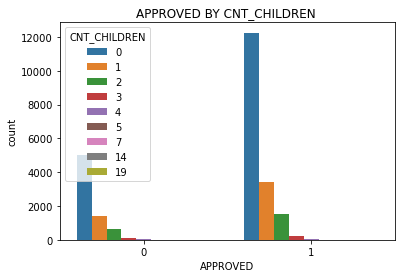

In [25]:
## APPROVED BY CNT_GENDER

sns.countplot(data = df, x = "APPROVED", hue = "CNT_CHILDREN")
plt.title('APPROVED BY CNT_CHILDREN ')

Text(0.5, 1.0, 'APPROVED BY NAME_FAMILY_STATUS')

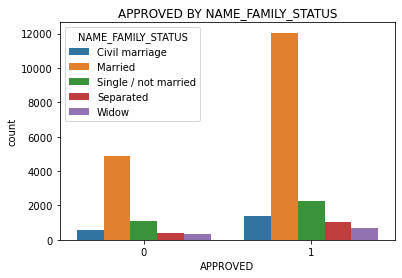

In [26]:
## APPROVED BY AGE

sns.countplot(data = df, x = "APPROVED", hue = "NAME_FAMILY_STATUS")
plt.title('APPROVED BY NAME_FAMILY_STATUS')

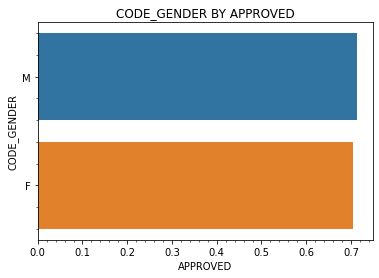

In [27]:
## APPROVED BY CODE_GENDER

sns.barplot(data = df, x = "APPROVED", y = "CODE_GENDER", ci = None)

plt.title('CODE_GENDER BY APPROVED')
plt.minorticks_on()

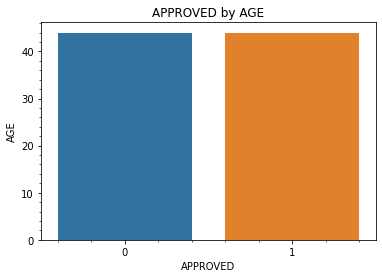

In [28]:
# AGE BY APPROVED

sns.barplot(data = df, x = "APPROVED", y = "AGE",ci = None)

plt.title('APPROVED by AGE')
plt.minorticks_on() 

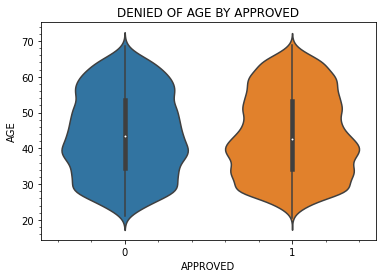

In [29]:
# Create a violin plot to show the denied of age across approved 

sns.violinplot(x = df["APPROVED"], y = df["AGE"])
plt.title('DENIED OF AGE BY APPROVED')
plt.minorticks_on() 